# Tabulation API Example: Nonadiabatic Flamelet Models

_This demo is part of Spitfire, with [licensing and copyright info here.](https://github.com/sandialabs/Spitfire/blob/master/license.md)_

_Highlights_

- using `build_nonadiabatic*` methods in Spitfire to build nonadiabatic equilibrium, Burke-Schumann, and SLFM models

This example builds nonadiabatic flamelet models and compares profiles of the temperature, mass fractions, and enthalpy defect of several nonadiabatic flamelet tabulation techniques for n-heptane chemistry.

In [1]:
from spitfire import (ChemicalMechanismSpec, 
                      FlameletSpec,
                      build_nonadiabatic_defect_eq_library, 
                      build_nonadiabatic_defect_bs_library, 
                      build_nonadiabatic_defect_transient_slfm_library,
                      build_nonadiabatic_defect_steady_slfm_library)
import matplotlib.pyplot as plt
import numpy as np

mech = ChemicalMechanismSpec(cantera_input='heptane-liu-hewson-chen-pitsch-highT.yaml', group_name='gas')
pressure = 101325.
air = mech.stream(stp_air=True)
air.TP = 300., pressure
fuel = mech.stream('TPX', (485., pressure, 'NXC7H16:1'))

flamelet_specs = {'mech_spec': mech, 'oxy_stream': air, 'fuel_stream': fuel, 'grid_points': 128}

In [2]:
l_eq = build_nonadiabatic_defect_eq_library(FlameletSpec(**flamelet_specs), verbose=False)
l_bs = build_nonadiabatic_defect_bs_library(FlameletSpec(**flamelet_specs), verbose=False)

In [3]:
l_ts = build_nonadiabatic_defect_transient_slfm_library(FlameletSpec(**flamelet_specs), 
                                                        verbose=True, 
                                                        diss_rate_values=np.array([1e-2, 1e-1, 1e0, 1e1, 1e2]),
                                                        diss_rate_log_scaled=True)

----------------------------------------------------------------------------------
building nonadiabatic (defect) SLFM library
----------------------------------------------------------------------------------
- mechanism: heptane-liu-hewson-chen-pitsch-highT.yaml
- 38 species, 105 reactions
- stoichiometric mixture fraction: 0.062
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
building adiabatic SLFM library
----------------------------------------------------------------------------------
- mechanism: heptane-liu-hewson-chen-pitsch-highT.yaml
- 38 species, 105 reactions
- stoichiometric mixture fraction: 0.062
----------------------------------------------------------------------------------
   1/   5 (chi_stoich =  1.0e-02 1/s)  converged in   5.44 s, T_max = 2249.2
   2/   5 (chi_stoich =  1.0e-01 1/s)  converged in   0.25 s, T_max = 2186.1
   3/   5 (chi_stoich = 

In [4]:
l_ss = build_nonadiabatic_defect_steady_slfm_library(FlameletSpec(**flamelet_specs), 
                                                     verbose=True, 
                                                     diss_rate_values=np.array([1e-2, 1e-1, 1e0, 1e1, 1e2]),
                                                     diss_rate_log_scaled=True,
                                                     solver_verbose=False,
                                                     h_stoich_spacing=1.e-3)

----------------------------------------------------------------------------------
building nonadiabatic (defect) SLFM library
----------------------------------------------------------------------------------
- mechanism: heptane-liu-hewson-chen-pitsch-highT.yaml
- 38 species, 105 reactions
- stoichiometric mixture fraction: 0.062
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
building adiabatic SLFM library
----------------------------------------------------------------------------------
- mechanism: heptane-liu-hewson-chen-pitsch-highT.yaml
- 38 species, 105 reactions
- stoichiometric mixture fraction: 0.062
----------------------------------------------------------------------------------
   1/   5 (chi_stoich =  1.0e-02 1/s)  converged in   3.81 s, T_max = 2249.2
   2/   5 (chi_stoich =  1.0e-01 1/s)  converged in   0.21 s, T_max = 2186.1
   3/   5 (chi_stoich = 

INFO:matplotlib.mathtext:Substituting symbol Z from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol Z from STIXNonUnicode


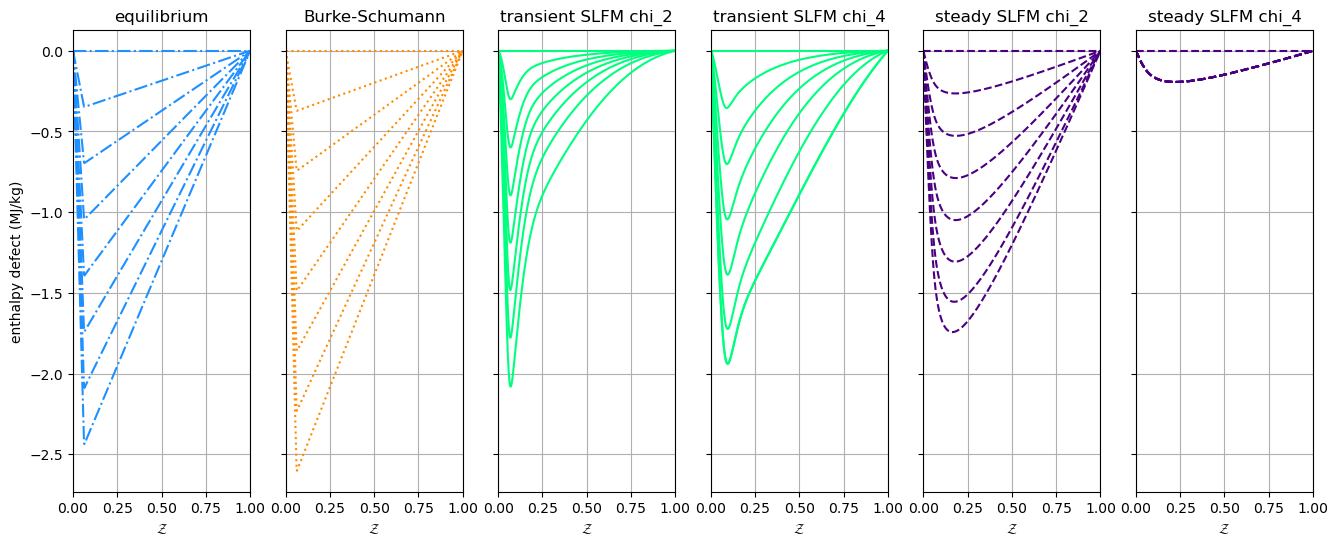

INFO:matplotlib.mathtext:Substituting symbol Z from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol Z from STIXNonUnicode


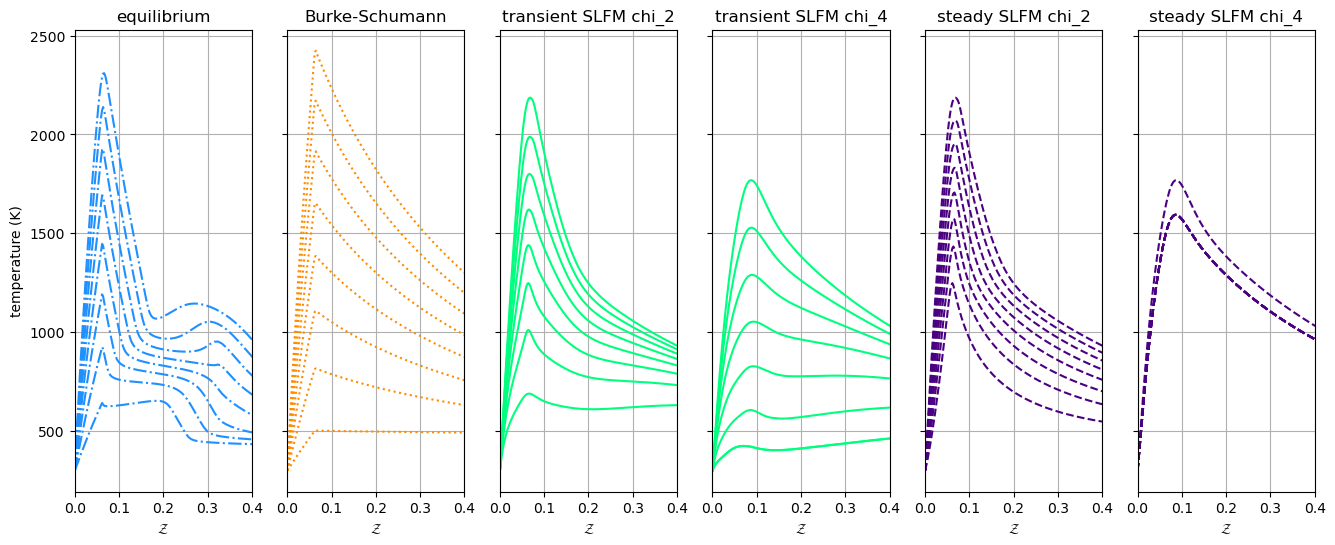

INFO:matplotlib.mathtext:Substituting symbol Z from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol Z from STIXNonUnicode


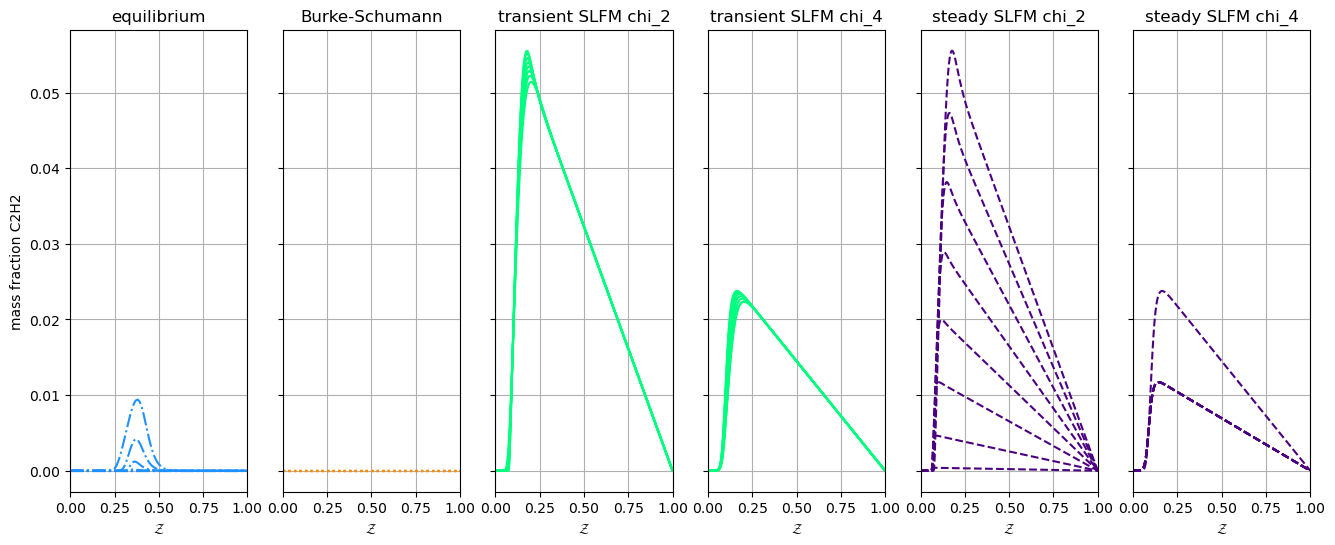

In [5]:
c_ts = 'SpringGreen'
c_ss = 'Indigo'
c_eq = 'DodgerBlue'
c_bs = 'DarkOrange'

ichi1 = 1
ichi2 = 4

fig, axarray = plt.subplots(1, 6, sharex=True, sharey=True)
axarray[0].plot(l_eq.mixture_fraction_values, l_eq['enthalpy_defect'][:, ::2] * 1e-6, '-.', color=c_eq)
axarray[1].plot(l_bs.mixture_fraction_values, l_bs['enthalpy_defect'][:, ::2] * 1e-6, ':', color=c_bs)
axarray[2].plot(l_ts.mixture_fraction_values, l_ts['enthalpy_defect'][:, ichi1, ::4] * 1e-6, '-', color=c_ts)
axarray[3].plot(l_ts.mixture_fraction_values, l_ts['enthalpy_defect'][:, ichi2, ::4] * 1e-6, '-', color=c_ts)
axarray[4].plot(l_ss.mixture_fraction_values, l_ss['enthalpy_defect'][:, ichi1, ::4] * 1e-6, '--', color=c_ss)
axarray[5].plot(l_ss.mixture_fraction_values, l_ss['enthalpy_defect'][:, ichi2, ::4] * 1e-6, '--', color=c_ss)
axarray[0].set_ylabel('enthalpy defect (MJ/kg)')
axarray[0].set_title('equilibrium')
axarray[1].set_title('Burke-Schumann')
axarray[2].set_title('transient SLFM chi_2')
axarray[3].set_title('transient SLFM chi_4')
axarray[4].set_title('steady SLFM chi_2')
axarray[5].set_title('steady SLFM chi_4')
for ax in axarray:
    ax.set_xlim([0, 1])
    ax.grid()
    ax.set_xlabel('$\\mathcal{Z}$')
fig.set_size_inches(16, 6)
plt.show()

fig, axarray = plt.subplots(1, 6, sharex=True, sharey=True)
axarray[0].plot(l_eq.mixture_fraction_values, l_eq['temperature'][:, ::2], '-.', color=c_eq)
axarray[1].plot(l_bs.mixture_fraction_values, l_bs['temperature'][:, ::2], ':', color=c_bs)
axarray[2].plot(l_ts.mixture_fraction_values, l_ts['temperature'][:, ichi1, ::4], '-', color=c_ts)
axarray[3].plot(l_ts.mixture_fraction_values, l_ts['temperature'][:, ichi2, ::4], '-', color=c_ts)
axarray[4].plot(l_ss.mixture_fraction_values, l_ss['temperature'][:, ichi1, ::4], '--', color=c_ss)
axarray[5].plot(l_ss.mixture_fraction_values, l_ss['temperature'][:, ichi2, ::4], '--', color=c_ss)
axarray[0].set_ylabel('temperature (K)')
axarray[0].set_title('equilibrium')
axarray[1].set_title('Burke-Schumann')
axarray[2].set_title('transient SLFM chi_2')
axarray[3].set_title('transient SLFM chi_4')
axarray[4].set_title('steady SLFM chi_2')
axarray[5].set_title('steady SLFM chi_4')
for ax in axarray:
    ax.set_xlim([0, 0.4])
    ax.grid()
    ax.set_xlabel('$\\mathcal{Z}$')
fig.set_size_inches(16, 6)
plt.show()

fig, axarray = plt.subplots(1, 6, sharex=True, sharey=True)
axarray[0].plot(l_eq.mixture_fraction_values, l_eq['mass fraction C2H2'][:, ::2], '-.', color=c_eq)
axarray[1].plot(l_bs.mixture_fraction_values, l_bs['mass fraction C2H2'][:, ::2], ':', color=c_bs)
axarray[2].plot(l_ts.mixture_fraction_values, l_ts['mass fraction C2H2'][:, ichi1, ::4], '-', color=c_ts)
axarray[3].plot(l_ts.mixture_fraction_values, l_ts['mass fraction C2H2'][:, ichi2, ::4], '-', color=c_ts)
axarray[4].plot(l_ss.mixture_fraction_values, l_ss['mass fraction C2H2'][:, ichi1, ::4], '--', color=c_ss)
axarray[5].plot(l_ss.mixture_fraction_values, l_ss['mass fraction C2H2'][:, ichi2, ::4], '--', color=c_ss)
axarray[0].set_ylabel('temperature (K)')
axarray[0].set_title('equilibrium')
axarray[1].set_title('Burke-Schumann')
axarray[2].set_title('transient SLFM chi_2')
axarray[3].set_title('transient SLFM chi_4')
axarray[4].set_title('steady SLFM chi_2')
axarray[5].set_title('steady SLFM chi_4')
axarray[0].set_ylabel('mass fraction C2H2')
for ax in axarray:
    ax.set_xlim([0, 1])
    ax.grid()
    ax.set_xlabel('$\\mathcal{Z}$')
fig.set_size_inches(16, 6)
plt.show()

INFO:matplotlib.mathtext:Substituting symbol Z from STIXNonUnicode


INFO:matplotlib.mathtext:Substituting symbol Z from STIXNonUnicode


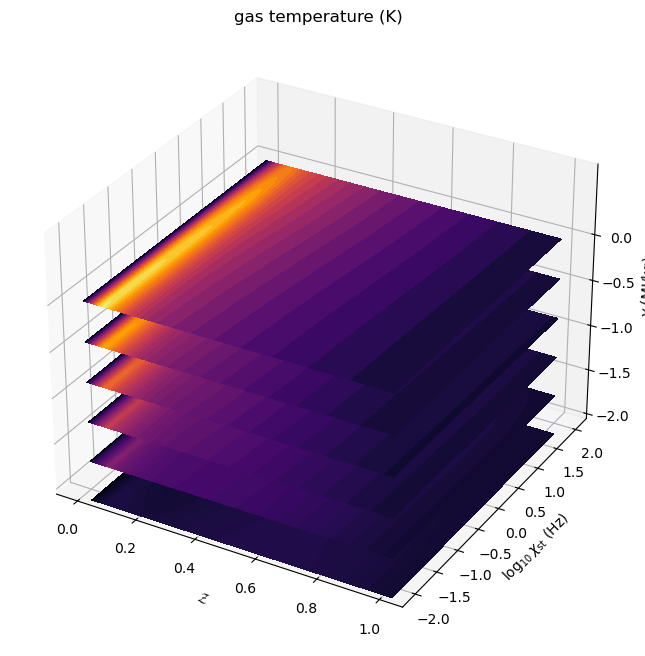

INFO:matplotlib.mathtext:Substituting symbol Z from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol Z from STIXNonUnicode


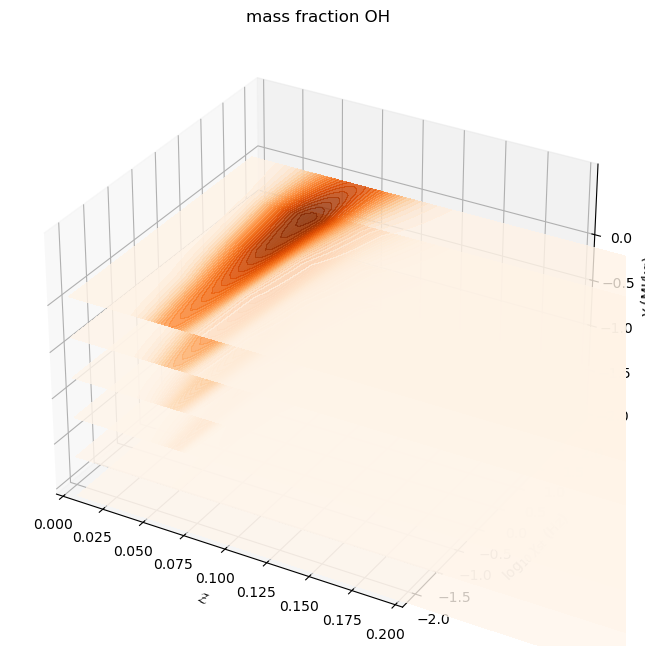

In [8]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import Normalize

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
z = l_ts.mixture_fraction_grid[:, :, 0]
x = np.log10(l_ts.dissipation_rate_stoich_grid[:, :, 0])
for ih in range(0, l_ts.enthalpy_defect_stoich_npts, 6):
    dh = l_ts.enthalpy_defect_stoich_values[ih]
    ax.contourf(z, x, l_ts['temperature'][:, :, ih], offset=dh / 1.e6, 
                cmap='inferno', levels=30, norm=Normalize(vmin=300, vmax=2400))
ax.set_zlim([0, 0.7])
ax.set_xlabel('$\\mathcal{Z}$')
ax.set_ylabel('$\\log_{10}\\chi_{\\rm st}$ (Hz)')
ax.set_zlabel('$\\gamma$ (MJ/kg)')
ax.set_zticks([-2.0, -1.5, -1.0, -0.5, 0.0])
ax.set_title('gas temperature (K)')
fig.set_size_inches(8, 8)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for ih in range(0, l_ts.enthalpy_defect_stoich_npts, 6):
    dh = l_ts.enthalpy_defect_stoich_values[ih]
    ax.contourf(z, x, l_ts['mass fraction OH'][:, :, ih], offset=dh / 1.e6, 
                cmap='Oranges', levels=30, norm=Normalize(vmin=0, vmax=5e-3), alpha=0.8)
ax.set_zlim([0, 0.7])
ax.set_xlabel('$\\mathcal{Z}$')
ax.set_ylabel('$\\log_{10}\\chi_{\\rm st}$ (Hz)')
ax.set_zlabel('$\\gamma$ (MJ/kg)')
ax.set_zticks([-2.0, -1.5, -1.0, -0.5, 0.0])
ax.set_xlim([0, 0.2])
ax.set_title('mass fraction OH')
fig.set_size_inches(8, 8)
plt.show()

INFO:matplotlib.mathtext:Substituting symbol Z from STIXNonUnicode


INFO:matplotlib.mathtext:Substituting symbol Z from STIXNonUnicode


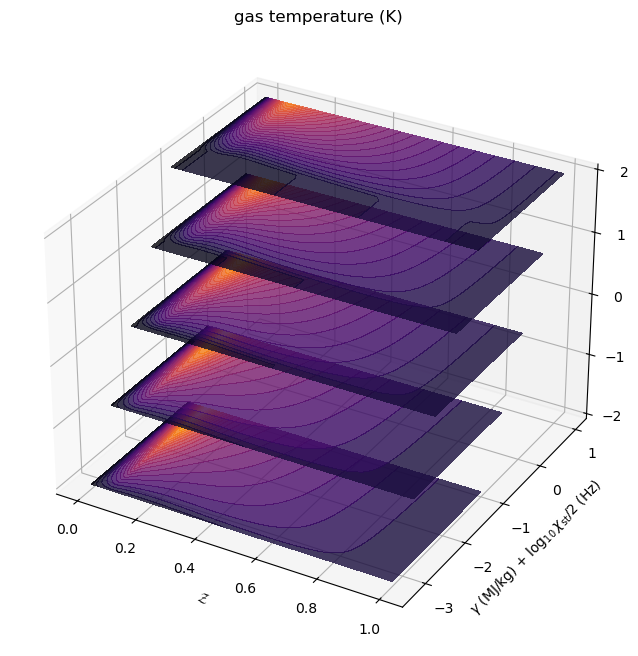

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
z = l_ts.mixture_fraction_grid[:, 0, :]
g = l_ts.enthalpy_defect_stoich_grid[:, 0, :] / 1.e6
for ichi in range(0, l_ts.dissipation_rate_stoich_npts):
    lchi = np.log10(l_ts.dissipation_rate_stoich_values[ichi])
    ax.contourf(z, g + lchi/2, l_ts['temperature'][:, ichi, :], offset=lchi, 
                cmap='inferno', levels=30, norm=Normalize(vmin=300, vmax=2400), alpha=0.8)
ax.set_zlim([0, 0.7])
ax.set_xlabel('$\\mathcal{Z}$')
ax.set_ylabel('$\\gamma$ (MJ/kg) + $\\log_{10}\\chi_{\\rm st}/2$ (Hz)')
ax.set_zlabel('$\\log_{10}\\chi_{\\rm st}$ (Hz)')
ax.set_zticks([-2, -1, 0, 1, 2])
ax.set_title('gas temperature (K)')
fig.set_size_inches(8, 8)
plt.show()